In [1]:
import numpy as np
import matplotlib.pyplot as plt

import jlinops
import sampi

# Toy problem

In [137]:
jlinops.sin_trapezoid().shape

(101,)

In [138]:
#ground_truth = jlinops.piecewise_constant_1d_test_problem()
ground_truth = jlinops.sin_trapezoid()[:-1]
n = len(ground_truth)
np.random.seed(0)
noise_stdev = 0.2
noise_var = noise_stdev**2
noisy_signal = ground_truth + noise_stdev*np.random.normal(size=n)
grid = np.arange(n)

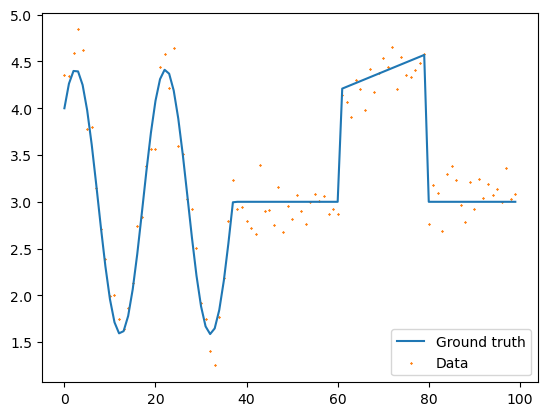

In [140]:
plt.plot(grid, ground_truth, label="Ground truth", color="C0")
plt.scatter(grid, noisy_signal, marker="x", label="Data", color="C1", alpha=1.0, s=0.5)
plt.legend()
plt.show()

# Do reconstruction of original L1-regularized problem

In [141]:
# # Solution is given by evaluating the proximal operator of the TV norm. This code uses a FDGP method
# fdgp_map_result, fdgp_data = jlinops.prox_tv1d_norm(noisy_signal, lam=noise_var*reg_lambda, iterations=100000, return_data=True)

In [142]:
# plt.scatter(grid, noisy_signal, marker="x", label="Data", color="C1", alpha=1.0, s=0.5)
# plt.plot(grid, fdgp_map_result, label="MAP estimate of L1 problem", color="C2")
# plt.legend()
# plt.show()

In [143]:
# # Check convergence
# plt.loglog(fdgp_data["obj_vals"])
# plt.show()

# Reconstruction by IAS

In [144]:
# Define forward operator and regularization matrix
F = jlinops.IdentityOperator((n,n))
R = jlinops.WaveletDetail1DOperator( n, wavelet="haar", mode="symmetric")
# R = jlinops.Wavelet1DOperator( n, wavelet="haar", mode="symmetric")

In [145]:

# _Rpinv = jlinops.MatrixLinearOperator(np.linalg.pinv(R.A.toarray()))
# Rpinv_factory = lambda theta: _Rpinv @ jlinops.DiagonalOperator(np.sqrt(theta))

# pdata = {
#     "W": W,
#     "Rpinv_factory": Rpinv_factory,
# }

pdata = {}

In [156]:
# Prior parameters

reg_lambda = 1e2

hyperparams = {
    "prior": {
        "r": 1.0,
        "beta": 1.5 + 1e-3,
        "vartheta": 2/(reg_lambda**2), # This is how to match the L1 lambda
    }
}

# Create solver
ias_solver = sampi.IASSolver(F, R, noisy_signal, hyperparams, noise_var=noise_var, pdata=pdata)

In [157]:
ias_data = ias_solver.solve(max_iters=200, 
                            early_stopping=True, 
                            warmstarting=True, 
                            eps=1e-3,
                           x_update_solver_params={"tol":1e-5},
                           )

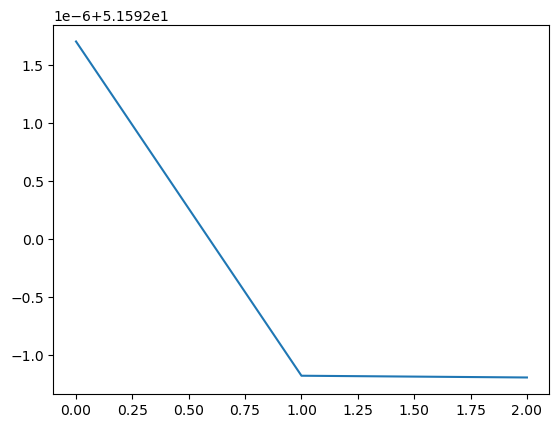

In [158]:
plt.plot(ias_data["obj_vals"])
plt.show()

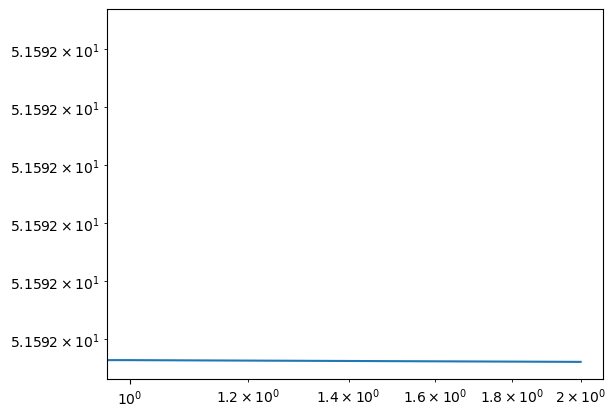

In [159]:
plt.loglog(ias_data["obj_vals"])
plt.show()

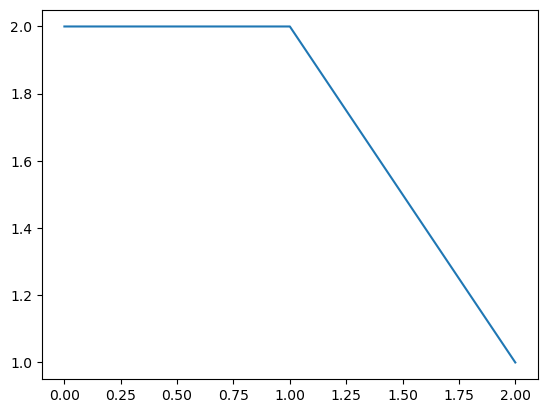

In [160]:
plt.plot(ias_data["n_cg_its_per_iteration"])
plt.show()

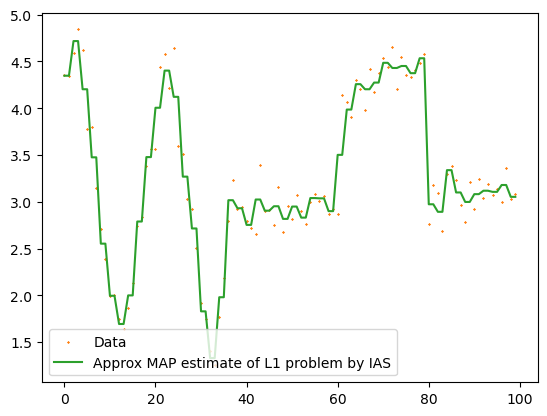

In [161]:
plt.scatter(grid, noisy_signal, marker="x", label="Data", color="C1", alpha=1.0, s=0.5)
plt.plot(grid, ias_data["x"], label="Approx MAP estimate of L1 problem by IAS", color="C2")
plt.legend()
plt.show()

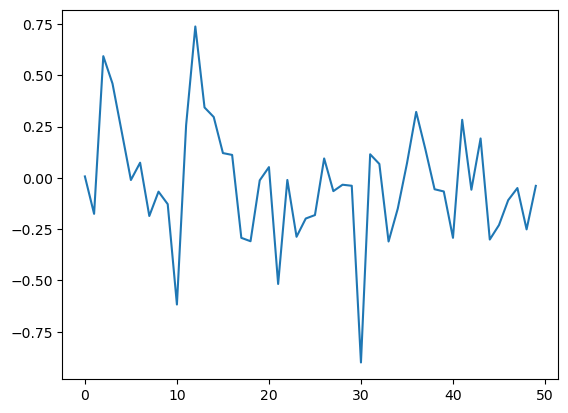

In [162]:
plt.plot( R @ noisy_signal )
plt.show()

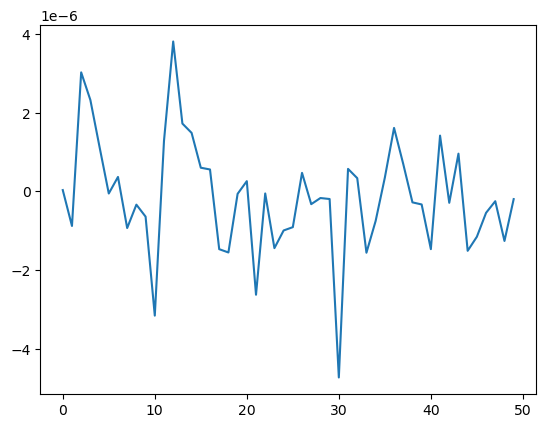

In [163]:
plt.plot( R @ ias_data["x"] )
plt.show()

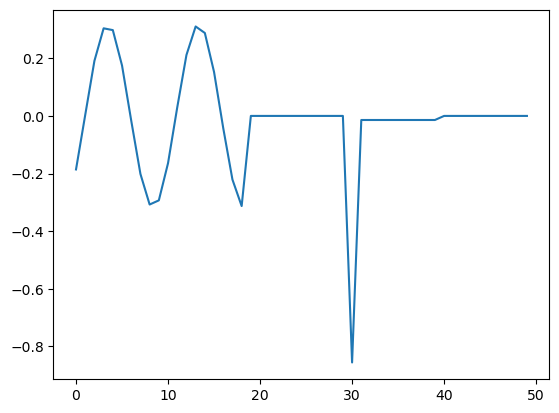

In [154]:
plt.plot( R @ ground_truth)
plt.show()

In [155]:
R @ ground_truth

array([-0.18577641,  0.00328897,  0.1910658 ,  0.3039868 ,  0.29781174,
        0.17495991, -0.01643779, -0.20139548, -0.30745038, -0.29305226,
       -0.16384203,  0.02955828,  0.21137825,  0.31038437,  0.287788  ,
        0.15244194, -0.04262787, -0.22099692, -0.31278372,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.85559921, -0.01414214, -0.01414214, -0.01414214, -0.01414214,
       -0.01414214, -0.01414214, -0.01414214, -0.01414214, -0.01414214,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])